### Step 0: Import libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

### Step 1: Set up webdriver and ChromeDriver
Check out this [video](https://www.youtube.com/watch?v=Q1CiZIYCsWM) if you want to learn how to download and get ready [ChromeDriver](https://chromedriver.chromium.org/downloads) 🤖

In [6]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("start-maximized")       # Maximize Chrome window
chrome_options.add_argument("--disable-extensions")  # Disable extensions
# chrome_options.add_argument('--headless')          # Do not open any window

driver = webdriver.Chrome('Resources/chromedriver.exe', options =chrome_options)

# Open web page
driver.get("https://www.bloomberglinea.com/especiales/500-personas-influyentes-latinoamerica-2022/")

### Step 2: Scrape data from Bloomberg page

In [46]:
# Empty lists that will contain names, countries, sectors and companies from influential people
names = []
countries = []
sectors = []
companies = []

# Number of rows (people) in certain region/country
n = len(driver.find_elements_by_xpath('/html/body/div/section/div/div/div/div[2]/div/div'))
    
# Extract name, country, sector and company
for j in range(4,n+1):
    name_country_path = '/html/body/div/section/div/div/div/div[2]/div/div[{}]/div/h2'.format(j)
    name_country = driver.find_elements(By.XPATH, value= name_country_path)[0].text
    
    name = name_country.split('(')[:-1][0].strip()
    names.append(name)
    
    country = name_country.split('(')[-1].split(')')[0]
    countries.append(country)

    sector_path = '/html/body/div/section/div/div/div/div[2]/div/div[{}]/h3'.format(j)
    sectors.append(driver.find_elements(By.XPATH, value= sector_path)[0].text)

    company_path = '/html/body/div/section/div/div/div/div[2]/div/div[{}]/h3[2]'.format(j)
    companies.append(driver.find_elements(By.XPATH, value= company_path)[0].text)

df = pd.DataFrame(list(zip(names, countries, sectors, companies)), columns =['Name', 'Country', 'Sector', 'Company'])
df = df.reset_index(drop=True)
df

,Name,Country,Sector,Company
0,Abilio Diniz,Brasil,Alimentos y Bebidas,Carrefour
1,Aby Lijtszain,México,Transporte,Grupo Traxión
2,Adolfo Orive,México,Alimentos y bebidas,Tetrapak
3,Adrian Neuhauser,Chile,Aerolíneas,Avianca
4,Adriana Barbosa,Brasil,CSO,Feira Preta
...,...,...,...,...
495,Viveka Kaitila,Brasil,Manufactura,GE
496,Vânia Nogueira de Alcântara Machado,Brasil,Farmacéutica,EDP
497,Wilson Ferreira Jr.,Brasil,Energía,Eletrobras
498,Ximena Behoteguy,Bolivia,Finanzas,Grupo CONFIE HOLDING


In [48]:
df.to_csv('Data/output.csv', index=False)

### Step 3: Fetch startup dataframe
Get rows whose <b>Sector</b> column is related to startup ecosystem like agtech, edtech, insurtech, fintech, foodtech y proptech.

In [27]:
startup_df = df[df['Sector'].str.contains('tech') | df['Company'].str.contains('tech')]
startup_df.loc[startup_df['Company'].str.contains('Insurtech') | (startup_df['Company']=='NaN'), 'Sector']='Insurtech' # Insurtech Azos
startup_df = startup_df.drop(startup_df[startup_df.Sector == 'Finanzas'].index) # Drop row whose sector is 'Finanzas'
startup_df = startup_df.reset_index(drop=True)
startup_df

C:\Users\SANDRO\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\SANDRO\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Name,Country,Sector,Company
0,Allan Apoj Pascal y David Poritz,México,Fintech,Covalto
1,Angel Sahagún,México,Fintech,Albo
2,Aron Schwarzkopf,Ecuador,Fintech,Kushki
3,Bárbara Garza Suess,México,Fintech,NaN
4,Bárbara González,México,Fintech,Bitso
5,Carlos Guayara,Colombia,Fintech,Trii
6,Claudia Woods,Brasil,Proptech,WeWork
7,Cristina Cacho,México,Fintech,Clara
8,Cristina Junqueira,Brasil,Fintech,Nubank
9,Daniel Bonifaz y Paulo Valdiviezo,Perú,Fintech,Kambista


In [28]:
startup_df.to_csv('Data/startup_output.csv', index=False)

### Step 4: Plot word cloud of names
You can visualize the other graphs on this [dashboard](https://datastudio.google.com/reporting/ea905eb8-e7d6-48f3-90bd-301ec24f41ea/)

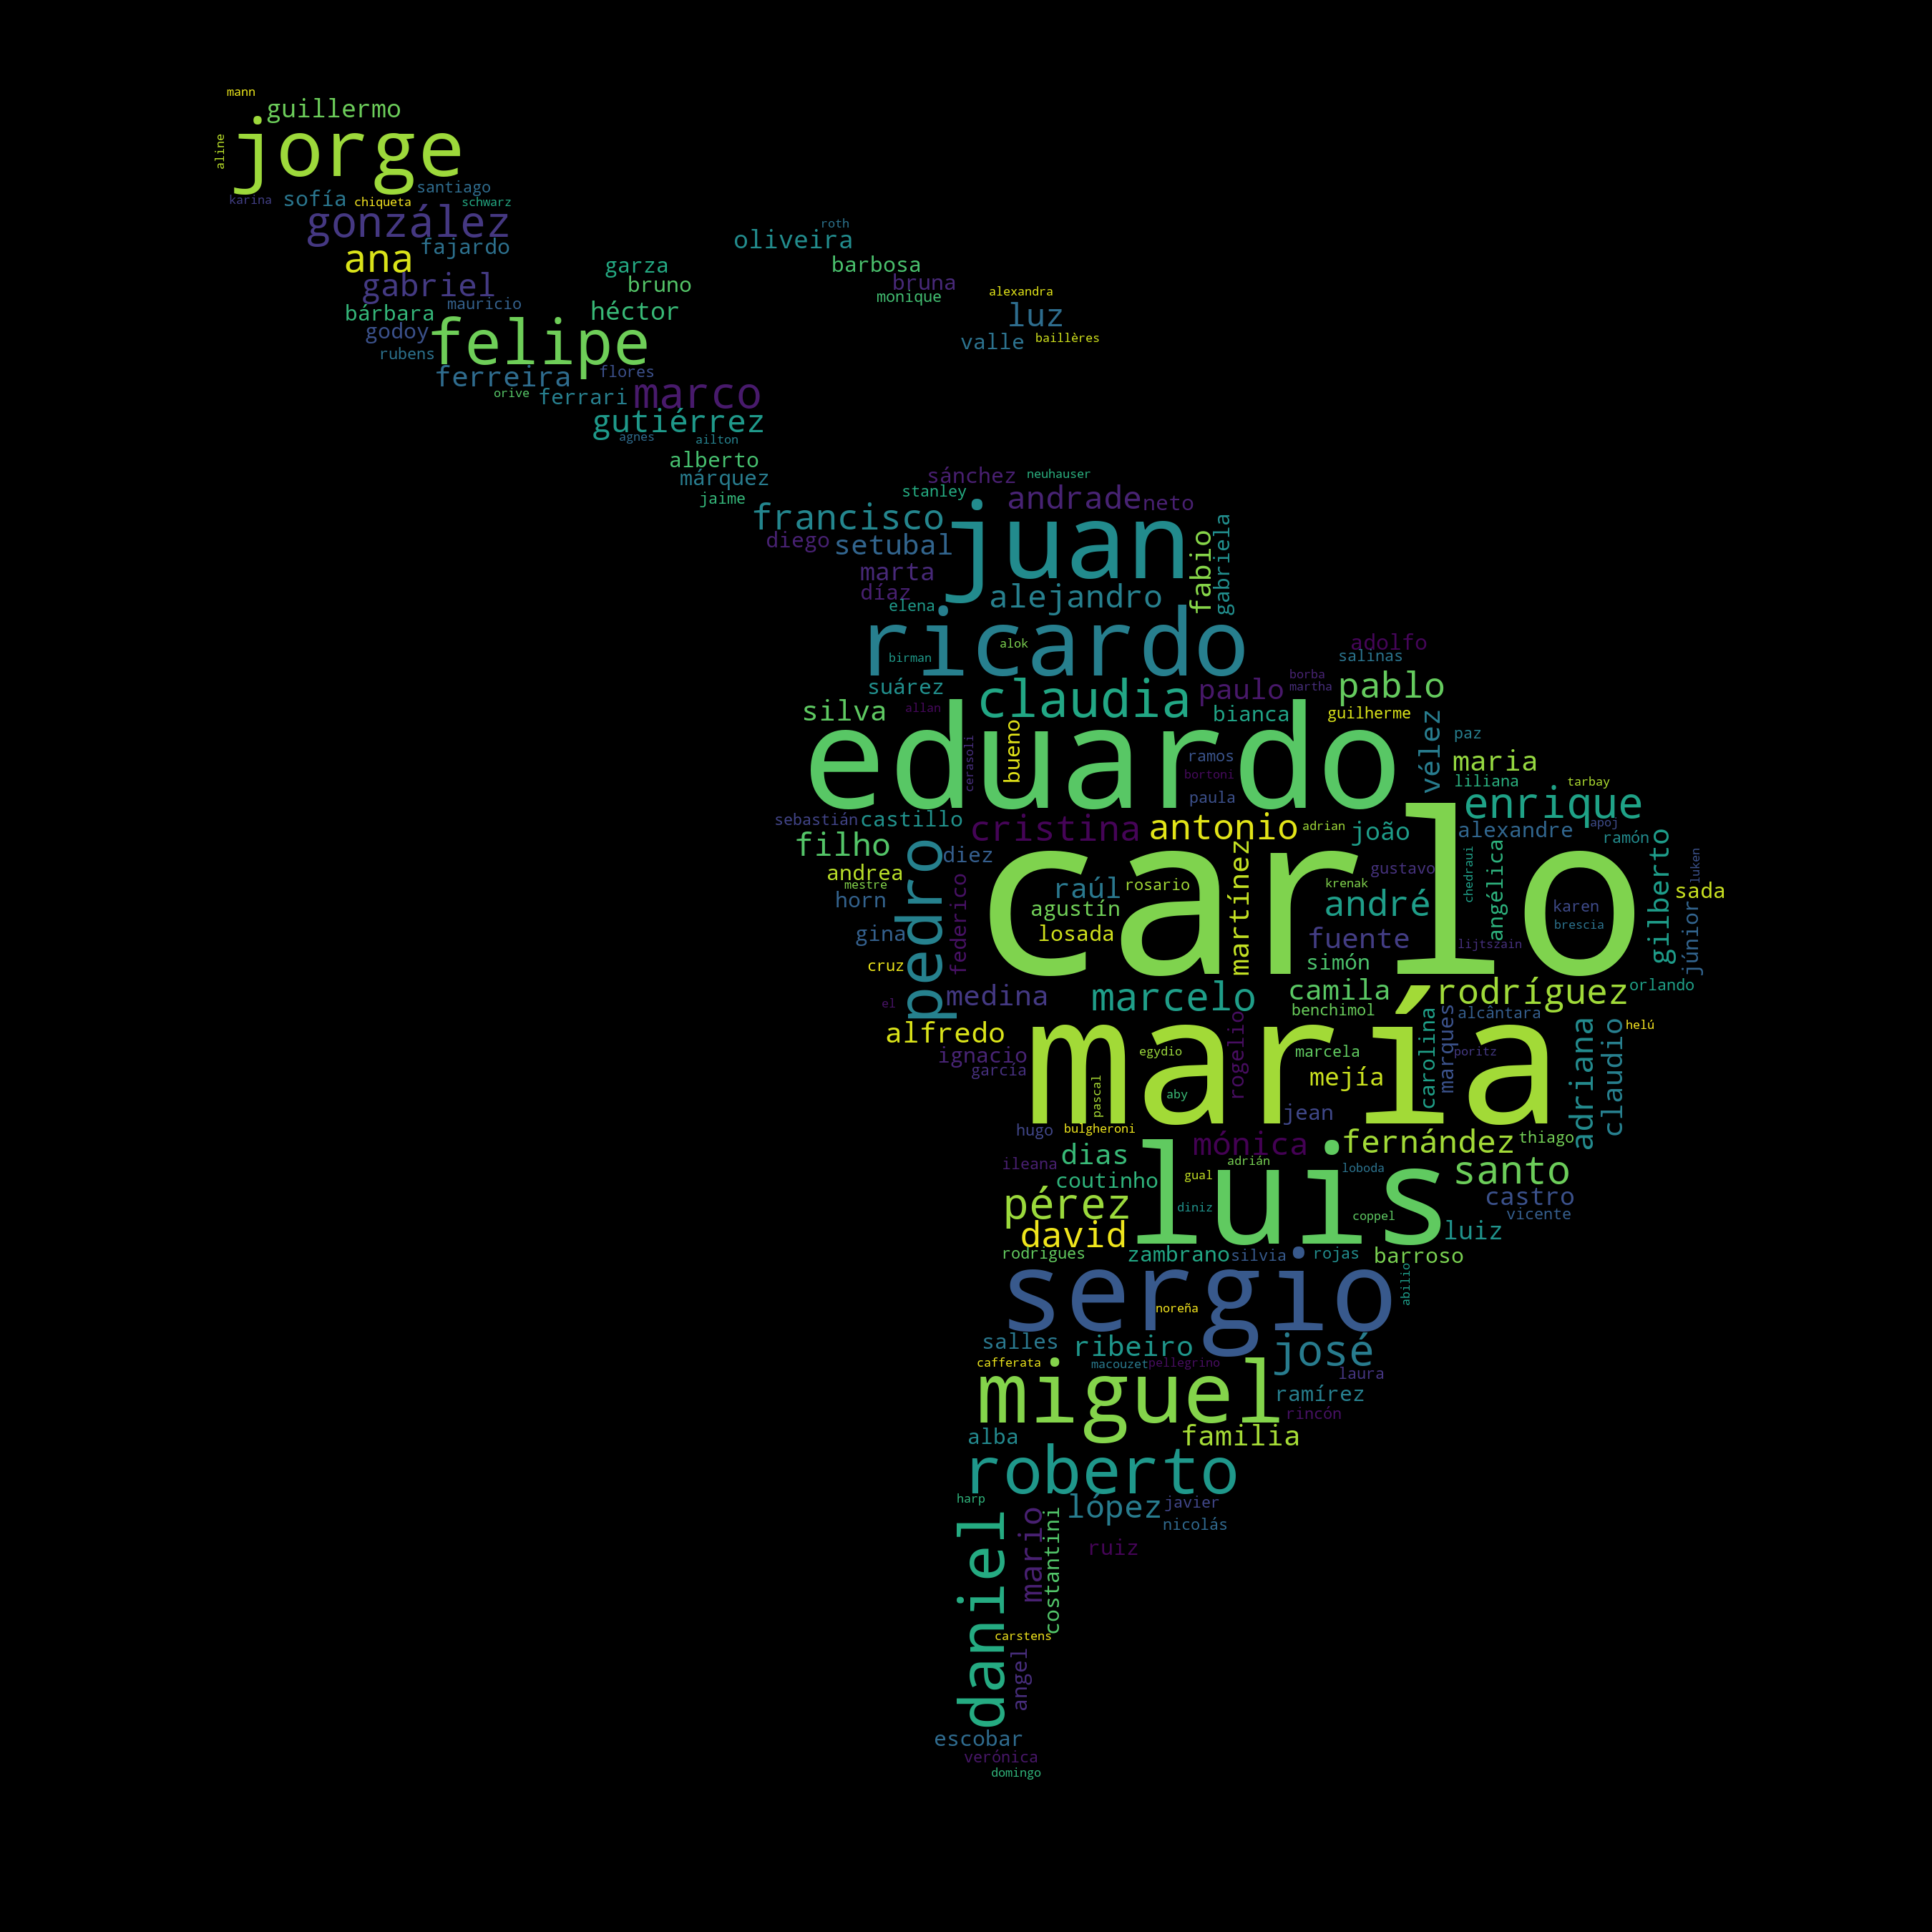

In [61]:
# Create a string that will contain all names
total_names = ' '
stopwords = STOPWORDS.update(['y','de','g','del','dos','da','la','jr'])
mask = np.array(Image.open('Resources/latam.jpg'))

# Get and accumulate all names of influential people
for person in df['Name'].values:
    names = str(person).lower().split()          # Get the lowercase words of each name
    for name in names:
        total_names = total_names + name + ' '   # Accumulate all names

wordcloud = WordCloud(scale=2.5, width = 1000, height = 800, 
                      background_color ='black',
                      mask = mask,
                      #colormap=latam,
                      stopwords = stopwords, 
                      min_font_size = 6).generate(total_names) 

# Plot the most used names in word cloud
wordcloud.to_image()